**Moviles Project**

**Content**
1.   Information about data
2.   Data Preprocesing
     *   Include Libraries
     *   Import Data
     *   Explore Data
     *   Missing Values
3.   Data Procesing
4.   Data Visualization
     *   Bar Plot
     *   Count Plot
5.  Results and conclusion
6.  References

# 1. Information about data

The "mobiles" dataset is a comprehensive collection of information about various mobile phones. It includes details on a range of features such as the names of the phones, links to their images, ratings, reviews, prices, memory, camera, display, battery, processor, and warranty information.

# 2.  Data Preprocesing

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # Seaborn is a library for making statistical graphics in Python.
%matplotlib inline

## 2.2 Load Data

In [ ]:
data =pd.read_csv("mobiles.csv")


## 2.3 Exploring Data

In [ ]:
#Shape of data
data.shape

(1148, 12)

In [ ]:
#view the first 5  elements of data
data.head()

,Unnamed: 0,names,images_links,stars,rating&reviews,price_details,memory,camara_info,display,battery,processor,warranty
0,0,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",https://rukminim1.flixcart.com/image/312/312/x...,4.4,"1,20,759 Ratings & 7,003 Reviews","₹9,699\n₹14,99935% off",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,50MP + 5MP + 2MP | 8MP Front Camera,16.76 cm (6.6 inch) Full HD+ Display,6000 mAh Lithium Ion Battery,Exynos 850 Processor,1 Year Warranty Provided By the Manufacturer f...
1,1,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",https://rukminim1.flixcart.com/image/312/312/x...,4.4,"1,20,759 Ratings & 7,003 Reviews","₹9,699\n₹14,99935% off",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,50MP + 5MP + 2MP | 8MP Front Camera,16.76 cm (6.6 inch) Full HD+ Display,6000 mAh Lithium Ion Battery,Exynos 850 Processor,1 Year Warranty Provided By the Manufacturer f...
2,2,itel it2163S,https://rukminim1.flixcart.com/image/312/312/l...,4.1,702 Ratings & 67 Reviews,₹989\n₹9991% off,4 MB RAM | 4 MB ROM | Expandable Upto 32 GB,1200 mAh Lithium Ion Battery,4.57 cm (1.8 inch) Quarter QVGA Display,7 Days Battery Backup with 1200mAh with Super ...,9 Indian Input Language Support,"BT Caller, Kingtalker"
3,3,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",https://rukminim1.flixcart.com/image/312/312/x...,4.4,"1,20,759 Ratings & 7,003 Reviews","₹10,699\n₹16,99937% off",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,50MP + 5MP + 2MP | 8MP Front Camera,16.76 cm (6.6 inch) Full HD+ Display,6000 mAh Lithium Ion Battery,Exynos 850 Processor,1 Year Warranty Provided By the Manufacturer f...
4,4,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",https://rukminim1.flixcart.com/image/312/312/x...,4.4,"1,20,759 Ratings & 7,003 Reviews","₹10,699\n₹16,99937% off",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,50MP + 5MP + 2MP | 8MP Front Camera,16.76 cm (6.6 inch) Full HD+ Display,6000 mAh Lithium Ion Battery,Exynos 850 Processor,1 Year Warranty Provided By the Manufacturer f...


In [ ]:
#Info data
data.info()

## 2.4 Missing Values

In [ ]:
data.isnull().sum()

Unnamed: 0          0
names             205
images_links        5
stars             226
rating&reviews    226
price_details       5
memory            205
camara_info       205
display           205
battery           205
processor         248
warranty          532
dtype: int64

**Summary of Data Preprocesing**

*   The data contains 1148 observations and 12 variables.
*   The data contains 10 categorical variables and 5 categorical values.
*   The data contain a missing values.
*   There are columns that contains two or more data, for example, we can note that the column "rating&reviews"  contains two data, so first we need to split some columns into two or more columns.

# 3. Procesing Data 

## 3.1 Split Columns into two or more columns

### Column "rating&"reviews"

In [ ]:
data[["Rating", "Reviews"]] = data["rating&reviews"].str.split("&", expand = True)
data[["rating&reviews", "Rating", "Reviews"]]

,rating&reviews,Rating,Reviews
0,"1,20,759 Ratings & 7,003 Reviews","1,20,759 Ratings","7,003 Reviews"
1,"1,20,759 Ratings & 7,003 Reviews","1,20,759 Ratings","7,003 Reviews"
2,702 Ratings & 67 Reviews,702 Ratings,67 Reviews
3,"1,20,759 Ratings & 7,003 Reviews","1,20,759 Ratings","7,003 Reviews"
4,"1,20,759 Ratings & 7,003 Reviews","1,20,759 Ratings","7,003 Reviews"
...,...,...,...
1143,NaN,NaN,NaN
1144,NaN,NaN,NaN
1145,NaN,NaN,NaN
1146,NaN,NaN,NaN


Now, let us make uniform the two new columns, so we need to remove the letter "Ratings" and "Reviews"

In [ ]:
data["Rating"]= data["Rating"].str.replace("Ratings", "")

data["Reviews"]= data["Reviews"].str.replace("Reviews", "")



Note that there are numbers that contain two commas, so we need to remove them

In [ ]:
data["Reviews"]= data["Reviews"].str.replace(",", "")
data["Rating"]= data["Rating"].str.replace(",", "")

data["Reviews"]= data["Reviews"].str.strip()
data["Rating"]= data["Rating"].str.strip()

data[["rating&reviews", "Rating", "Reviews"]].head()

,rating&reviews,Rating,Reviews
0,"1,20,759 Ratings & 7,003 Reviews",120759,7003
1,"1,20,759 Ratings & 7,003 Reviews",120759,7003
2,702 Ratings & 67 Reviews,702,67
3,"1,20,759 Ratings & 7,003 Reviews",120759,7003
4,"1,20,759 Ratings & 7,003 Reviews",120759,7003


In [ ]:
data[["rating&reviews", "Rating", "Reviews"]].isnull().sum()

### Column "memory"

In [ ]:
data[["Ram", "Interna", "Externa"]] = data["memory"].str.split("|", expand = True)

In [ ]:
#Adjust the data in the true column
for i,row in enumerate(data.Externa):
  if "None" in str(row):
    data.loc[i,"Externa"]= "0"
for i,row in enumerate(data["Interna"]):
  if " Expandable Upto" in str(row):
    data.loc[i,"Externa"]= data.loc[i,"Interna"]
    data.loc[i,"Interna"]= "0"
  if "None" in str(row):
    data.loc[i,"Interna"]= "0"


for i,row in enumerate(data["Ram"]):
  if "ROM" in str(row):
    data.loc[i,"Interna"]= data.loc[i,"Ram"]
    data.loc[i,"Ram"]= "0"
  elif "Expandable Upto 8 GB" in str(row):
    data.loc[i,"Externa"]= data.loc[i,"Ram"]
    data.loc[i,"Ram"]= "0"
  elif "6.6 cm (2.6 inch) QVGA Display" in str(row):
    data.loc[i,"Ram"]="0"

 #Removing the word  " ROM", "ROM", "RAM", "Expandable Upto"  
data['Externa'] = data['Externa'].str.replace('Expandable Upto ', '')
data['Interna'] = data['Interna'].str.replace(' ROM ', '')
data['Interna'] = data['Interna'].str.replace('ROM', '')
data['Ram'] = data['Ram'].str.replace(' RAM ', '')

#Removing the blank space
data["Interna"]=data["Interna"].str.strip()
data["Externa"]=data["Externa"].str.strip()

data["Interna"]=data["Interna"].str.replace("0 GB","0")
data["Interna"]=data["Interna"].str.replace("0 MB","0") 

In [ ]:
#Final result from column "memory"
data[["memory","Ram", "Interna", "Externa"]].head()


,memory,Ram,Interna,Externa
0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,4 GB,64 GB,1 TB
1,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,4 GB,64 GB,1 TB
2,4 MB RAM | 4 MB ROM | Expandable Upto 32 GB,4 MB,4 MB,32 GB
3,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,4 GB,128 GB,1 TB
4,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,4 GB,128 GB,1 TB


In [ ]:
data[["memory","Ram", "Interna", "Externa"]].isnull().sum()

memory     205
Ram        205
Interna    205
Externa    205
dtype: int64

### Column "name"

In [ ]:
import numpy as np
for i, row in enumerate(data["names"]):
  word=str(row)
  if "(PRODUCT)" in word:
    word= word.replace("(PRODUCT)","")
    data.loc[i,"names"]= word
  elif "(1)" in word:
    word= word.replace("(1)","")
    data.loc[i,"names"]= word
  elif "(Without Charger)" in word:
    word= word.replace("(Without Charger)","")
    data.loc[i,"names"]= word
data.loc[ data["names"]=="MarQ by Flipkart M3 Smart (M3) (Blue,32GB)( 2GB RAM)",["names"]]=  "MarQ by Flipkart M3 Smart M3 (Blue,32GB 2GB RAM)"

In [ ]:
import numpy as np
for i, row in enumerate(data["names"]):
  word=str(row)
  if "(" in word:
    data.loc[i,["Name","Color"]] = data.loc[i,"names"].split("(")
  elif "nan" in word:
    data.loc[i,["Name"]]= None
    data.loc[i,["Color"]]=None
  else:
    data.loc[i,["Name"]] = row
    data.loc[i,["Color"]]="No Define"

In [ ]:
for i, row in enumerate(data["Color"]):
  word=str(row)
  x=word.replace(")","")
  data.loc[i,"Color"]= x

for i, row in enumerate(data["Color"]):
  word=str(row)
  if "," in word:
    pp= data.loc[i,"Color"].split(",")
    data.loc[i,"Color"]= pp[0]
  else:
    data.loc[i,"Color"]= word

In [ ]:
data["Name"]= data["Name"].str.title()

In [ ]:
#Vizualizing  the final result
data[["names","Name","Color"]].head(5)

,names,Name,Color
0,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",Samsung Galaxy F13,Waterfall Blue
1,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",Samsung Galaxy F13,Sunrise Copper
2,itel it2163S,Itel It2163S,No Define
3,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",Samsung Galaxy F13,Nightsky Green
4,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",Samsung Galaxy F13,Waterfall Blue


In [ ]:
 data[["names","Name","Color"]].isnull().sum()

names    205
Name     205
Color      0
dtype: int64

In [ ]:
 data[["names","Name","Color"]].isnull().sum()

names    205
Name     205
Color      0
dtype: int64

### Column "price_details"

In [ ]:
data[["Price", "Discount"]] = data["price_details"].str.split("\n", expand = True)
for i, row in enumerate(data.Price):
  if "off" in str(row):
    data.loc[i,"Price"]=data.loc[i,"Discount"]
    data.loc[i,"Price"]="0"

In [ ]:
data["Price"]=data["Price"].str.replace("₹","")
data["Discount"]=data["Discount"].str.replace("₹","")
data["Discount"]=data["Discount"].str.replace("% off","")
data["Price"]=data["Price"].str.replace(",","")
data["Discount"]=data["Discount"].str.replace(",","")

In [ ]:
#Show the final result for the column "price_details"
data[["price_details", "Price","Discount"]].head()

,price_details,Price,Discount
0,"₹9,699\n₹14,99935% off",9699,1499935
1,"₹9,699\n₹14,99935% off",9699,1499935
2,₹989\n₹9991% off,989,9991
3,"₹10,699\n₹16,99937% off",10699,1699937
4,"₹10,699\n₹16,99937% off",10699,1699937


In [ ]:
data[["price_details", "Price","Discount"]].isnull().sum()

price_details      5
Price              5
Discount         333
dtype: int64

### Column "camara_info"

In [ ]:
data[["Back", "Front"]]=data["camara_info"].str.split("|", expand = True)
data[["camara_info","Back", "Front"]].head()

,camara_info,Back,Front
0,50MP + 5MP + 2MP | 8MP Front Camera,50MP + 5MP + 2MP,8MP Front Camera
1,50MP + 5MP + 2MP | 8MP Front Camera,50MP + 5MP + 2MP,8MP Front Camera
2,1200 mAh Lithium Ion Battery,1200 mAh Lithium Ion Battery,None
3,50MP + 5MP + 2MP | 8MP Front Camera,50MP + 5MP + 2MP,8MP Front Camera
4,50MP + 5MP + 2MP | 8MP Front Camera,50MP + 5MP + 2MP,8MP Front Camera


In [ ]:
# split Back into  4 columns " Back Main", "Back2","Back3","Back4" 
data[["Main Back", "Back2", "Back3", "Back4"]]=data["Back"].str.split("+", expand = True)
print(data[["Back","Main Back", "Back2", "Back3", "Back4"]].head())

                           Back                     Main Back  Back2  Back3  \
0             50MP + 5MP + 2MP                          50MP    5MP    2MP    
1             50MP + 5MP + 2MP                          50MP    5MP    2MP    
2  1200 mAh Lithium Ion Battery  1200 mAh Lithium Ion Battery   None   None   
3             50MP + 5MP + 2MP                          50MP    5MP    2MP    
4             50MP + 5MP + 2MP                          50MP    5MP    2MP    

  Back4  
0  None  
1  None  
2  None  
3  None  
4  None  


In [ ]:
data["Main Back"].unique()

array(['50MP ', '1200 mAh Lithium Ion Battery', '13Mp ',
       '2MP Rear Camera', '13MP Rear Camera ', '13MP ', '64MP ', '12MP ',
       '8MP Rear Camera ', nan, '0.3MP Rear Camera', '0MP Front Camera',
       '48MP ', '108MP ', '50 MP ', '8MP Dual Camera ',
       '13MP Rear Camera', '5MP Rear Camera', '800 mAh Battery',
       '50MP Rear Camera', '1.3MP Rear Camera', '1000 mAh Battery',
       '1MP Rear Camera', '50MP (OIS) ', '8 MP ', '12.2MP ',
       '1750 mAh Battery', '64MP Rear Camera',
       '800 mAh Lithium Ion Battery', '12MP Rear Camera',
       '108MP Rear Camera', '0.08MP Rear Camera', '8MP Rear Camera',
       '50MP Rear Camera ', '1020 mAh Lithium-ion Battery',
       '620 mAh Battery', '64MP (OIS) ', '200MP ', '0MP ',
       '0.8MP Rear Camera', '48MP Rear Camera', '8MP ',
       '48MP Primary Camera ', '16MP ', '0.03MP Rear Camera',
       '5MP Rear Camera ', '1000 mAh Li-Ion Battery',
       '0.3MP Rear Camera ', '1800 mAh Battery', '16MP Rear Camera ',
       '32M

We can see that our values are a mixture of battery, rear camera, and front camera, the next code is to put the data in the adequated column

In [ ]:
#Make uniform the column "Main Back"
for i,row in enumerate(data["Main Back"]):
  if "Rear" in str(row):
    data.loc[i,"Rear"]= "Si"
  else:
    data.loc[i,"Rear"]= "No"

for i,row in enumerate(data["Main Back"]):
  if "Battery" in str(row):
    data.loc[i,"battery"]= data.loc[i,"Main Back"]
    data.loc[i,"Main Back"]="0"

for i,row in enumerate(data["Main Back"]):
  if "Front" in str(row):
    data.loc[i,"Front"]= data.loc[i,"Main Back"]
    data.loc[i,"Main Back"]="0"

In [ ]:
data["Main Back"]=data["Main Back"].str.strip()
data["Main Back"]=data["Main Back"].str.replace("Rear Camera","")

View  the values of "Back2"

In [ ]:
data["Back2"].unique()

array([' 5MP ', None, ' AI Lens ', ' 2MP ', ' 8MP ', ' 12MP ', nan,
       ' 0.3MP ', ' 2 MP Depth Lens ', ' 2 MP ', ' 2MP (Depth) ',
       ' Depth Lens ', ' 50MP ', ' 2MP Depth Sensor ', ' 13MP ',
       ' 2MP Depth ', ' 2MP Depth Lens ', ' 10MP ', ' 48MP ',
       ' Depth Sensor ', ' 2MP Macro Lens ', ' 2MP', ' Digital Camera '],
      dtype=object)

In [ ]:
for i,row in enumerate(data["Back2"]):
  if "None" in str(row):
    data.loc[i,"Back2"]= "0"
data["Back2"].unique()

array([' 5MP ', '0', ' AI Lens ', ' 2MP ', ' 8MP ', ' 12MP ', nan,
       ' 0.3MP ', ' 2 MP Depth Lens ', ' 2 MP ', ' 2MP (Depth) ',
       ' Depth Lens ', ' 50MP ', ' 2MP Depth Sensor ', ' 13MP ',
       ' 2MP Depth ', ' 2MP Depth Lens ', ' 10MP ', ' 48MP ',
       ' Depth Sensor ', ' 2MP Macro Lens ', ' 2MP', ' Digital Camera '],
      dtype=object)

View  the values of "Back3"

In [ ]:
data["Back3"].unique()

array([' 2MP ', None, nan, ' 0.3MP ', ' AI Lens ', ' QVGA ', ' 16MP ',
       ' 2MP (Macro) ', ' 2MP Macro Sensor ', ' 5MP ', ' 8MP (OIS) ',
       ' AI lens ', ' 12MP ', ' 2MP Depth Sensor ', ' 10MP ',
       ' 2 MP Macro Lens '], dtype=object)

In [ ]:
for i,row in enumerate(data["Back3"]):
  if "None" in str(row):
    data.loc[i,"Back3"]= "0"
data["Back3"].unique()

array([' 2MP ', '0', nan, ' 0.3MP ', ' AI Lens ', ' QVGA ', ' 16MP ',
       ' 2MP (Macro) ', ' 2MP Macro Sensor ', ' 5MP ', ' 8MP (OIS) ',
       ' AI lens ', ' 12MP ', ' 2MP Depth Sensor ', ' 10MP ',
       ' 2 MP Macro Lens '], dtype=object)

View the values of "Back4"

In [ ]:
data["Back4"].unique()

array([None, nan, ' 2MP ', ' 5MP ', ' 12MP '], dtype=object)

In [ ]:
for i,row in enumerate(data["Back4"]):
  if "None" in str(row):
    data.loc[i,"Back4"]= "0"
data["Back4"].unique()

array(['0', nan, ' 2MP ', ' 5MP ', ' 12MP '], dtype=object)

Make uniforme Column "Front"

In [ ]:
data["Front"]=data["Front"].str.replace("Front Camera","")
data["Front"]=data["Front"].str.strip()

data["Front"].unique()

array(['8MP', None, '5MP', '16MP', '12MP', nan, '13MP', '0MP', '32MP',
       '60 MP with OIS', '44MP', '16MP + 2MP Dual', '20MP', '60MP',
       '10.8MP', '32MP + 2MP Dual', '2MP', '10MP', '16MP + 16MP Dual',
       '50MP + 8MP Dual', '0.3MP'], dtype=object)

In [ ]:
for i,row in enumerate(data["Front"]):
  if "None" in str(row):
    data.loc[i,"Front"]= "0"
data["Front"].unique()

array(['8MP', '0', '5MP', '16MP', '12MP', nan, '13MP', '0MP', '32MP',
       '60 MP with OIS', '44MP', '16MP + 2MP Dual', '20MP', '60MP',
       '10.8MP', '32MP + 2MP Dual', '2MP', '10MP', '16MP + 16MP Dual',
       '50MP + 8MP Dual', '0.3MP'], dtype=object)

In [ ]:
#eliminate the column "Back"
data.drop(["Back"], axis=1 , inplace =True)

Final result from column "camara_info"

In [ ]:
data[["camara_info","Main Back", "Back2", "Back3", "Back4","Front", "Rear"]].head()

,camara_info,Main Back,Back2,Back3,Back4,Front,Rear
0,50MP + 5MP + 2MP | 8MP Front Camera,50MP,5MP,2MP,0,8MP,No
1,50MP + 5MP + 2MP | 8MP Front Camera,50MP,5MP,2MP,0,8MP,No
2,1200 mAh Lithium Ion Battery,0,0,0,0,0,No
3,50MP + 5MP + 2MP | 8MP Front Camera,50MP,5MP,2MP,0,8MP,No
4,50MP + 5MP + 2MP | 8MP Front Camera,50MP,5MP,2MP,0,8MP,No


### Column "display"

In [ ]:
data[["Inch", "Display"]] = data["display"].str.split(")", expand = True)

for i, row in  enumerate(data.Inch):
  if "nch" in str(row):
   data.loc[i, "Inch"]=data.loc[i, "Inch"].split("(")[1]

In [ ]:
data['Inch'] = data['Inch'].str.replace('inch', '')
data['Inch'] = data['Inch'].str.replace('Inch', '')
data['Inch'] = data['Inch'].str.strip()

data.Inch.unique()

array(['6.6', '1.8', '6.82', '6.53', '6.55', '6.7', '6.43', '6.1', '6.5',
       nan, '6.4', '2.8', '1.77', '6.44', '6.56', '6.58', '6.52', '6.47',
       '6.72', '2', '6.67', '2.4', '1.5', '6.59', '6.14', '6.51', '1.44',
       '6.62', '6.26', '6.38', '6.78', '6.8', '1.4', '2.6', '6.9', '6.3',
       '6.57', '0.66', '5.45', '5', '6.517', '2MP Rear Camera', '6.515',
       '7', '6.68', '4', '6.22', '6.95', '6.088', '5.4', '6.08'],
      dtype=object)

In [ ]:
data["Display"] = data["Display"].str.replace("+","")
data["Display"] = data["Display"].str.replace("Display","") 
data["Inch"]= data["Inch"].str.strip()

<ipython-input-86-24ec4a59dd78>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Display"] = data["Display"].str.replace("+","")


In [ ]:
data[["display", "Inch", "Display"]].head(5)

,display,Inch,Display
0,16.76 cm (6.6 inch) Full HD+ Display,6.6,Full HD
1,16.76 cm (6.6 inch) Full HD+ Display,6.6,Full HD
2,4.57 cm (1.8 inch) Quarter QVGA Display,1.8,Quarter QVGA
3,16.76 cm (6.6 inch) Full HD+ Display,6.6,Full HD
4,16.76 cm (6.6 inch) Full HD+ Display,6.6,Full HD


In [ ]:
data[["display", "Inch", "Display"]].isnull().sum()

display    205
Inch       205
Display    206
dtype: int64

### Column "battery"

In [ ]:
data[["Capacity(mAh)","Compound"]] = data["battery"].str.split("mAh", expand = True)
data["Capacity(mAh)"].unique()

array(['6000 ', '1200 ', '1000 ', '5000 ',
       'A15 Bionic Chip, 6 Core Processor Processor', nan,
       'A13 Bionic Chip Processor', '2500 ', '800 ', '4800 ', '4000 ',
       'A14 Bionic Chip with Next Generation Neural Engine Processor',
       '1020 ', '1750 ', 'A15 Bionic Chip Processor', '2575 ', '4410 ',
       '4700 ', '4020 ', '850 ', '4500 ', '1500 ', '5020 ', '1700 ',
       '1450 ', '4050 ', '3000 ', '4310 ', '620 ', '3900 ', '400 ',
       '4980 ', '1800 ', '600 ', '4926 ', '7000 ', '2502 ', '4400 ',
       'A16 Bionic Chip, 6 Core Processor Processor', '4270 ', '1900 ',
       '5050 ', '4610 ', '3020 ', '5200 ', '3700 ', '2700 ', '3300 ',
       '4230 ', '4250 ', '1100 ', '1600 ', '300 ', '5080 ', '4200 ',
       '1150 ', '700 ', '2750 ', '4060 '], dtype=object)

In [ ]:
data.loc[data["Capacity(mAh)"]=="7 Days Battery Backup with 1200",["Capacity(mAh)"]]
data['Capacity(mAh)'] = data['Capacity(mAh)'].str.replace("7 Days Battery Backup with ", '')

### Column "processor"

In [ ]:
for i, row in enumerate(data["processor"]):
  if "Processor" in str(row):
     data.loc[i,"processor"]= row
  else:
    data.loc[i,"processor"]= "No Define"
data["processor"]=data["processor"].str.replace(" Processor", "")
data.processor.head(50)

0                     Exynos 850
1                     Exynos 850
2                      No Define
3                     Exynos 850
4                     Exynos 850
5                   MediaTek G37
6                      No Define
7                   MediaTek G37
8                   MediaTek G37
9                   MediaTek G37
10            MediaTek Helio G25
11            MediaTek Helio G35
12    Qualcomm Snapdragon 695 5G
13       Qualcomm Snapdragon 680
14       Qualcomm Snapdragon 680
15            Mediatek Helio G96
16                     No Define
17                  MediaTek G35
18            Mediatek Helio G96
19       Qualcomm Snapdragon 680
20            Mediatek Helio A22
21            Mediatek Helio A22
22                   Unisoc T606
23                     No Define
24                     No Define
25                     No Define
26                     No Define
27                     No Define
28            Mediatek Helio A22
29            Mediatek Helio G85
30        

## 3.2  "Clean Data"

For this notebook, we will work with this columns

['Name','stars', 'Color', 'Price','Rating', 'Reviews', 'Ram', 'Interna','Externa','Front','Main Back', 'Back2', 'Back3','Back42','Rear Camera', "Inch", "Display", "Capacity(mAh)"]

In [ ]:
newdata=data[['Name','stars', 'Color', 'Price','Rating', 'Reviews', 'Ram', 'Interna','Externa','Front','Main Back','Back2', 'Back3','Back4','Rear', "Inch", "Display", "Capacity(mAh)"]]

newdata.head()

,Name,stars,Color,Price,Rating,Reviews,Ram,Interna,Externa,Front,Main Back,Back2,Back3,Back4,Rear,Inch,Display,Capacity(mAh)
0,Samsung Galaxy F13,4.4,Waterfall Blue,9699,120759,7003,4 GB,64 GB,1 TB,8MP,50MP,5MP,2MP,0,No,6.6,Full HD,6000
1,Samsung Galaxy F13,4.4,Sunrise Copper,9699,120759,7003,4 GB,64 GB,1 TB,8MP,50MP,5MP,2MP,0,No,6.6,Full HD,6000
2,Itel It2163S,4.1,No Define,989,702,67,4 MB,4 MB,32 GB,0,0,0,0,0,No,1.8,Quarter QVGA,1200
3,Samsung Galaxy F13,4.4,Nightsky Green,10699,120759,7003,4 GB,128 GB,1 TB,8MP,50MP,5MP,2MP,0,No,6.6,Full HD,6000
4,Samsung Galaxy F13,4.4,Waterfall Blue,10699,120759,7003,4 GB,128 GB,1 TB,8MP,50MP,5MP,2MP,0,No,6.6,Full HD,6000


In [ ]:
newdata.shape

(1148, 18)

## 3.3 Handle Missing Values

In [ ]:
newdata.isnull().sum()

Name             205
stars            226
Color              0
Price              5
Rating           226
Reviews          226
Ram              205
Interna          205
Externa          205
Front            205
Main Back        205
Back2            205
Back3            205
Back4            205
Rear               0
Inch             205
Display          206
Capacity(mAh)    205
dtype: int64

In [ ]:
newdata.dropna(inplace=True)

<ipython-input-91-5293ff12282c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata.dropna(inplace=True)


In [ ]:
newdata.isnull().sum()

Name             0
stars            0
Color            0
Price            0
Rating           0
Reviews          0
Ram              0
Interna          0
Externa          0
Front            0
Main Back        0
Back2            0
Back3            0
Back4            0
Rear             0
Inch             0
Display          0
Capacity(mAh)    0
dtype: int64

In [ ]:
newdata.shape

(921, 18)

In [ ]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 0 to 1141
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           921 non-null    object 
 1   stars          921 non-null    float64
 2   Color          921 non-null    object 
 3   Price          921 non-null    object 
 4   Rating         921 non-null    object 
 5   Reviews        921 non-null    object 
 6   Ram            921 non-null    object 
 7   Interna        921 non-null    object 
 8   Externa        921 non-null    object 
 9   Front          921 non-null    object 
 10  Main Back      921 non-null    object 
 11  Back2          921 non-null    object 
 12  Back3          921 non-null    object 
 13  Back4          921 non-null    object 
 14  Rear           921 non-null    object 
 15  Inch           921 non-null    object 
 16  Display        921 non-null    object 
 17  Capacity(mAh)  921 non-null    object 
dtypes: float6

## 3.4 Becoming categorical data into numerical data

In [ ]:
newdata['Price'] = newdata['Price'].astype(float)
newdata['Rating'] = newdata['Rating'].astype(float)
newdata['Reviews'] = newdata['Reviews'].astype(float)
newdata["Inch"]= newdata["Inch"].astype(float)

<ipython-input-95-4fdb98a5f47b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata['Price'] = newdata['Price'].astype(float)
<ipython-input-95-4fdb98a5f47b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata['Rating'] = newdata['Rating'].astype(float)
<ipython-input-95-4fdb98a5f47b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

# 4. Data Visualization

## BarPlot

### Top 10 Celular With Most Rating

Text(0, 0.5, 'Rating')

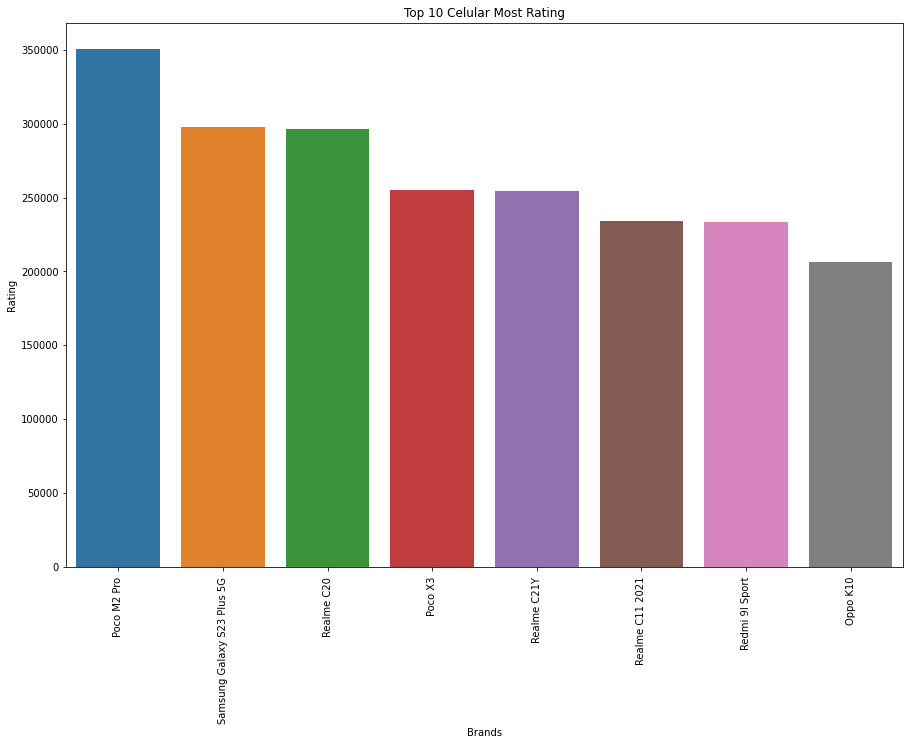

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df10HR = newdata.sort_values(by = "Rating", ascending = False).head(10)

plt.figure(figsize= (15,10))
sns.barplot( x= "Name", y= "Rating", data= df10HR)
plt.title("Top 10 Celular Most Rating")
plt.xticks(rotation = 90)
plt.xlabel("Brands")
plt.ylabel("Rating")

### Top 10 Most Reviews

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Poco M2 Pro '),
  Text(1, 0, 'Poco X3 '),
  Text(2, 0, 'Samsung Galaxy S23 Plus 5G '),
  Text(3, 0, 'Samsung Guru Music 2'),
  Text(4, 0, 'Infinix Smart 6 '),
  Text(5, 0, 'Nokia Ta-1459'),
  Text(6, 0, 'Realme C20 '),
  Text(7, 0, 'Redmi 9I Sport ')])

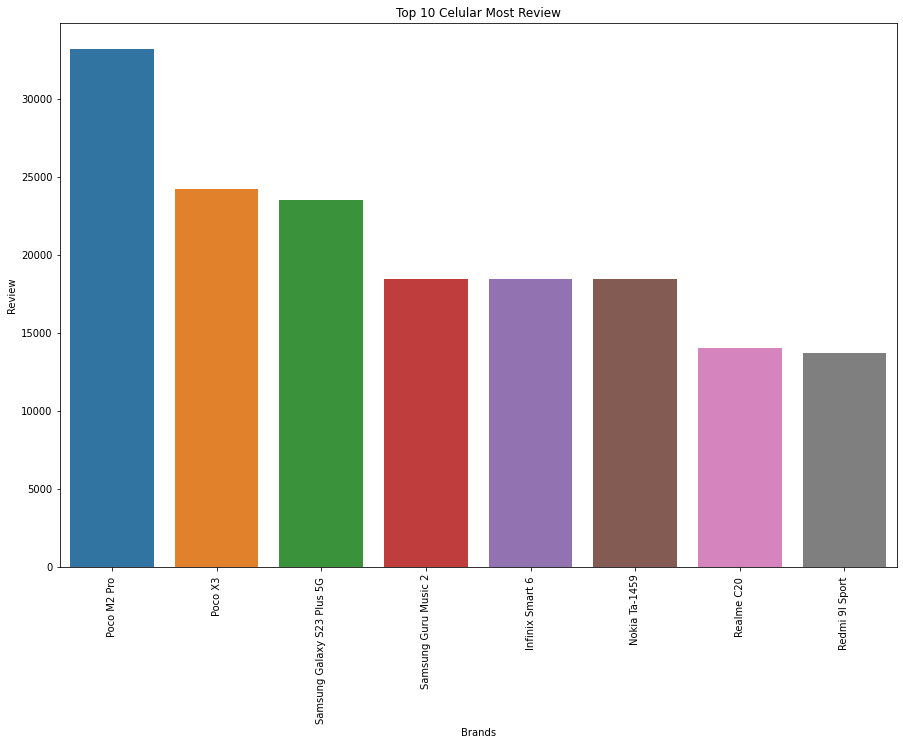

In [ ]:
df10MR= newdata.sort_values(by="Reviews", ascending= False).head(10)
plt.figure(figsize= (15,10))
sns.barplot( x= "Name", y= "Reviews", data= df10MR)
plt.title("Top 10 Celular Most Review")
plt.xlabel("Brands")
plt.ylabel("Review")
plt.xticks(rotation = 90)

### Top 10 Most Expensive

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Poco M2 Pro '),
  Text(1, 0, 'Poco X3 '),
  Text(2, 0, 'Samsung Galaxy S23 Plus 5G '),
  Text(3, 0, 'Samsung Guru Music 2'),
  Text(4, 0, 'Infinix Smart 6 '),
  Text(5, 0, 'Nokia Ta-1459'),
  Text(6, 0, 'Realme C20 '),
  Text(7, 0, 'Redmi 9I Sport ')])

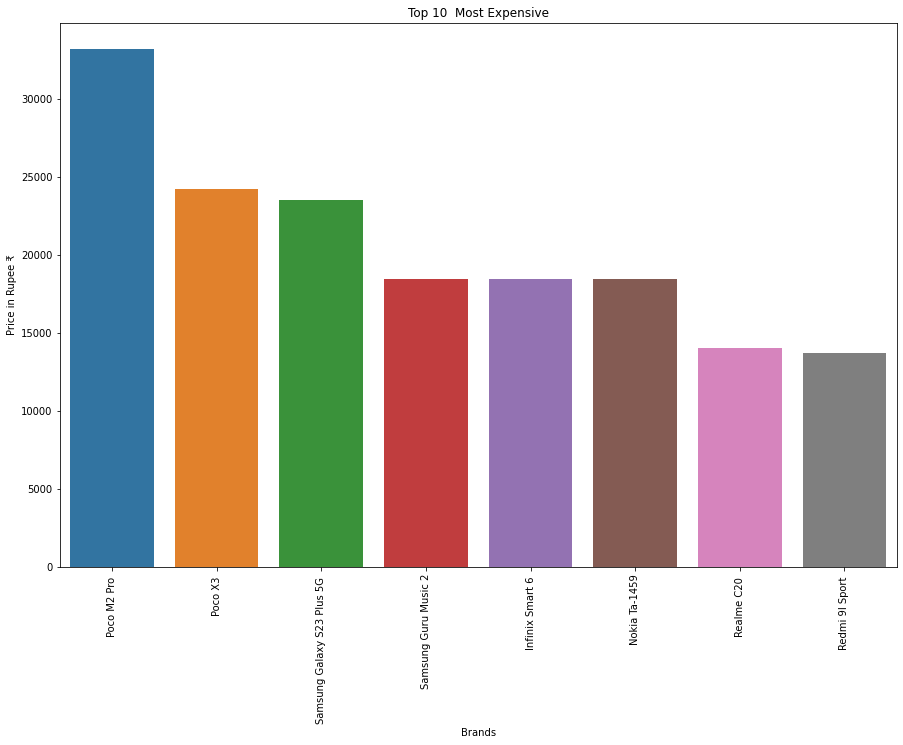

In [ ]:
df10ME= newdata.sort_values(by="Price", ascending= False).head(10)
plt.figure(figsize= (15,10))
sns.barplot( x= "Name", y= "Reviews", data= df10MR)
plt.title("Top 10  Most Expensive")
plt.ylabel("Price in Rupee ₹")
plt.xlabel("Brands")
plt.xticks(rotation = 90)

## CountPlot

### Production of Cellphone according to the Size of Screen in Inch

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, '0.66'),
  Text(1, 0, '1.4'),
  Text(2, 0, '1.44'),
  Text(3, 0, '1.5'),
  Text(4, 0, '1.77'),
  Text(5, 0, '1.8'),
  Text(6, 0, '2.0'),
  Text(7, 0, '2.4'),
  Text(8, 0, '2.6'),
  Text(9, 0, '2.8'),
  Text(10, 0, '4.0'),
  Text(11, 0, '5.0'),
  Text(12, 0, '5.4'),
  Text(13, 0, '5.45'),
  Text(14, 0, '6.08'),
  Text(15, 0, '6.088'),
  Text(16, 0, '6.1'),
  Text(17, 0, '6.14'),
  Text(18, 0, '6.22'),
  Text(19, 0, '6.26'),
  Text(20, 0, '6.3'),
  Text(21, 0, '6.38'),
  Text(22, 0, '6.4'),
  Text(23, 0, '6.43'),
  Text(24, 0, '6.44'),
  Text(25, 0, '6.47'),
  Text(26, 0, '6.5'),
  Text(27, 0, '6.51'),
  Text(28, 0, '6.515'),
  Text(29, 0, '6.517'),
  Text(30, 0, '6.52'),
  Text(31, 0, '6.53'),
  Text(32, 0, '6.55'),
  Text(33, 0, '6.56'),
  Text(34, 0, '6.

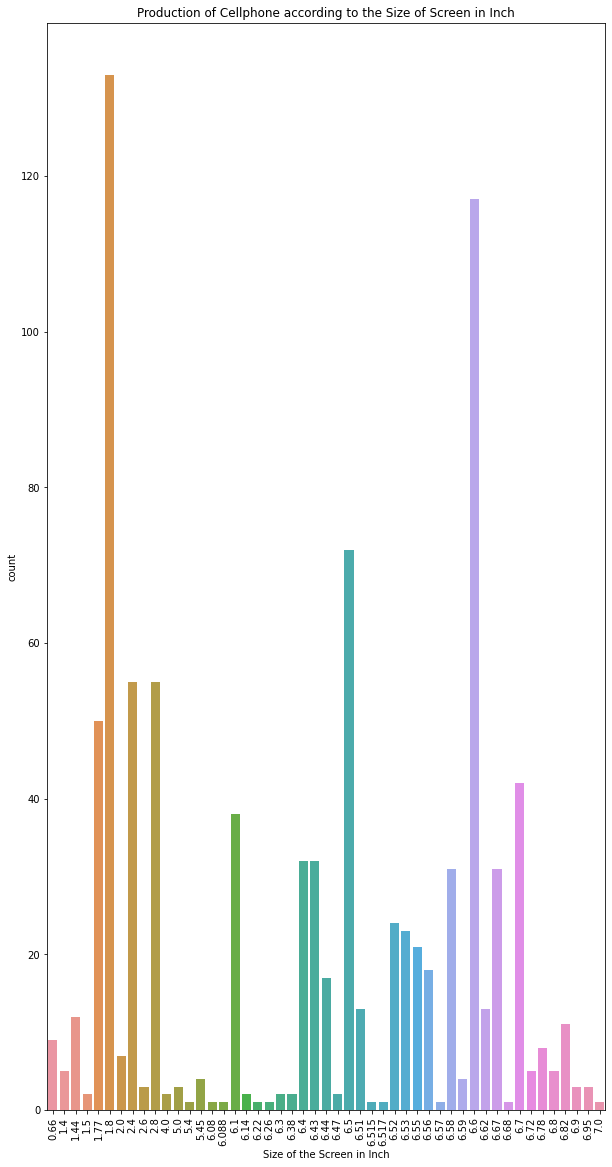

In [ ]:
df10LS= data.sort_values(by= "Inch", ascending= False )
plt.figure(figsize=(10,20))
sns.countplot(x="Inch", data=newdata)
plt.title("Production of Cellphone according to the Size of Screen in Inch")
plt.xlabel("Size of the Screen in Inch")
plt.xticks(rotation=90)

### Production of Cellphone  According its Main Back Camara

In [ ]:
sns.countplot(x="Main Back", data=newdata)
plt.title("Production of Cellphone  According its Main Back Camara")
plt.xlabel("Main Back Camara")
plt.xticks(rotation= 90)

### Production of Cellphone According to its Ram Memory

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '4 GB'),
  Text(1, 0, '4 MB'),
  Text(2, 0, '64 MB'),
  Text(3, 0, '8 GB'),
  Text(4, 0, '6 GB'),
  Text(5, 0, '0'),
  Text(6, 0, '2 GB'),
  Text(7, 0, '8 MB'),
  Text(8, 0, '32 MB'),
  Text(9, 0, '3 GB'),
  Text(10, 0, '12 GB'),
  Text(11, 0, '56 MB'),
  Text(12, 0, '24 MB'),
  Text(13, 0, '153 MB'),
  Text(14, 0, '31 MB'),
  Text(15, 0, '48 MB'),
  Text(16, 0, '0.046875 GB'),
  Text(17, 0, '128 MB'),
  Text(18, 0, '1 GB'),
  Text(19, 0, '52 MB'),
  Text(20, 0, '0.53')])

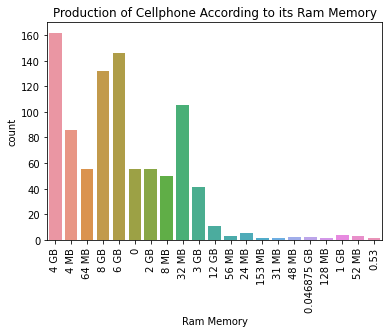

In [ ]:
sns.countplot(x= "Ram", data=newdata)
plt.title("Production of Cellphone According to its Ram Memory")
plt.xlabel("Ram Memory")
plt.xticks(rotation=90)

### Production of Cellphone According to its Internal Memory

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, '64 GB'),
  Text(1, 0, '4 MB'),
  Text(2, 0, '128 GB'),
  Text(3, 0, '64 MB'),
  Text(4, 0, '32 GB'),
  Text(5, 0, '8 MB'),
  Text(6, 0, '32 MB'),
  Text(7, 0, 'NA'),
  Text(8, 0, '256 GB'),
  Text(9, 0, '0'),
  Text(10, 0, '3 MB'),
  Text(11, 0, '128 MB'),
  Text(12, 0, '24 MB'),
  Text(13, 0, '56 MB'),
  Text(14, 0, '153 MB'),
  Text(15, 0, '16 MB'),
  Text(16, 0, '32 KB'),
  Text(17, 0, '36 MB'),
  Text(18, 0, '0.125 GB'),
  Text(19, 0, '16 GB'),
  Text(20, 0, '8 GB'),
  Text(21, 0, '2000'),
  Text(22, 0, 'NA KB')])

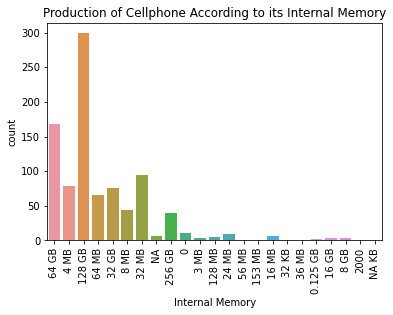

In [ ]:
sns.countplot(x= "Interna", data=newdata)
plt.title("Production of Cellphone According to its Internal Memory")
plt.xlabel("Internal Memory")
plt.xticks(rotation=90)

# 5.  Results and conclusions

We have cleaned a data set, and now we can see that the data is more legible. This new format facilitates us to visualize many hidden variables. We can graphic several count plots, and bar plots in a very illustrative way. The next step will be  predicted the price using some regressor model of machine learning 

# 6.  References

https://www.kaggle.com/datasets/anas123siddiqui/mobiles